In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import generic_filter

In [2]:
#1. Load Ultrasound or Radar Images & Add Speckle Noise
# Function to add speckle noise
def add_speckle_noise(image, intensity=0.1):
    noise = np.random.randn(*image.shape) * intensity
    noisy_image = image + image * noise
    return np.clip(noisy_image, 0, 255).astype(np.uint8)

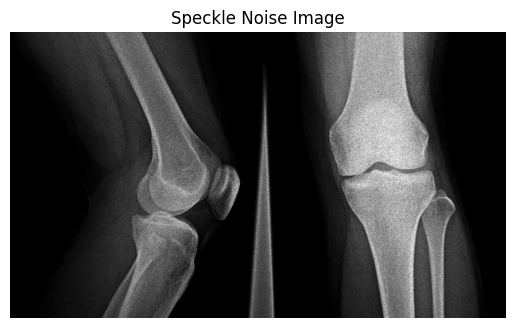

In [3]:
# Load image
image = cv2.imread('program2.jpg', cv2.IMREAD_GRAYSCALE)
speckle_image = add_speckle_noise(image, intensity=0.1)

# Display the noisy image
plt.imshow(speckle_image, cmap='gray')
plt.title('Speckle Noise Image')
plt.axis('off')
plt.show()


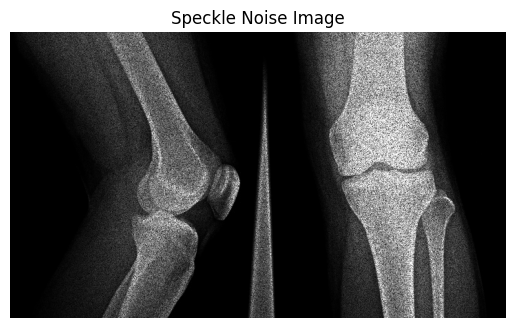

In [4]:
# Load image
image = cv2.imread('program2.jpg', cv2.IMREAD_GRAYSCALE)
speckle_image = add_speckle_noise(image, intensity=0.3)

# Display the noisy image
plt.imshow(speckle_image, cmap='gray')
plt.title('Speckle Noise Image')
plt.axis('off')
plt.show()


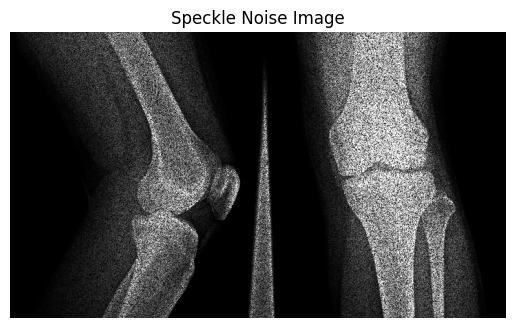

In [5]:
# Load image
image = cv2.imread('program2.jpg', cv2.IMREAD_GRAYSCALE)
speckle_image = add_speckle_noise(image, intensity=0.5)

# Display the noisy image
plt.imshow(speckle_image, cmap='gray')
plt.title('Speckle Noise Image')
plt.axis('off')
plt.show()


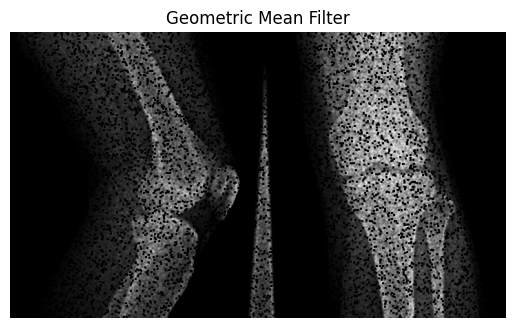

In [6]:
#2. Apply Geometric Mean Filter
from scipy.ndimage import generic_filter

# Geometric Mean Filter function
def geometric_mean_filter(image, size=3):
    def geo_mean(values):
        product = np.prod(values)
        return product ** (1.0 / len(values))
    
    return generic_filter(image, geo_mean, size=(size, size))

# Apply filter
geo_filtered = geometric_mean_filter(speckle_image)

# Display the result
plt.imshow(geo_filtered, cmap='gray')
plt.title('Geometric Mean Filter')
plt.axis('off')
plt.show()


In [11]:
#3. Load Any Image & Add Salt and Gaussian Noise
# Function to add salt and Gaussian noise
def add_salt_gaussian_noise(image, salt_prob=0.02, gaussian_std=10):
    noisy_image = image.copy()
    
    # Add Gaussian noise
    gauss = np.random.normal(0, gaussian_std, image.shape)
    noisy_image = cv2.add(noisy_image, gauss.astype(np.uint8))
    
    # Add Salt noise
    num_salt = np.ceil(salt_prob * image.size)
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    noisy_image[tuple(coords)] = 255
    return np.clip(noisy_image, 0, 255).astype(np.uint8)


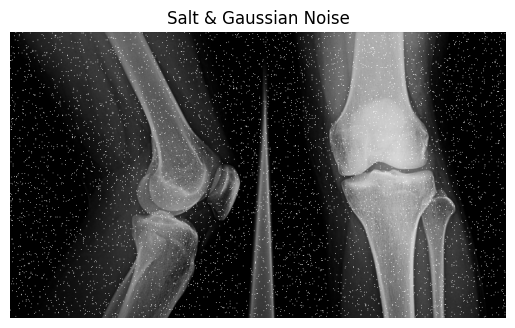

In [13]:
# Apply noise
salt_gaussian_image = add_salt_gaussian_noise(image, salt_prob=0.02, gaussian_std=0.2)
# Display the noisy image
plt.imshow(salt_gaussian_image, cmap='gray')
plt.title('Salt & Gaussian Noise')
plt.axis('off')
plt.show()


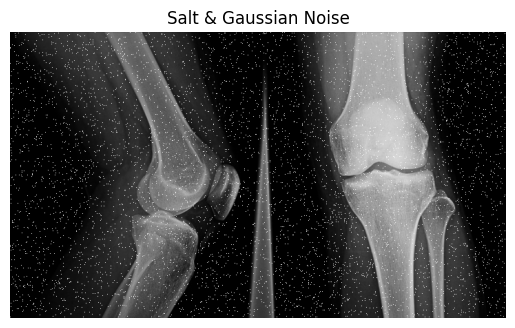

In [14]:

# Apply noise
salt_gaussian_image = add_salt_gaussian_noise(image, salt_prob=0.02, gaussian_std=0.3)
# Display the noisy image
plt.imshow(salt_gaussian_image, cmap='gray')
plt.title('Salt & Gaussian Noise')
plt.axis('off')
plt.show()



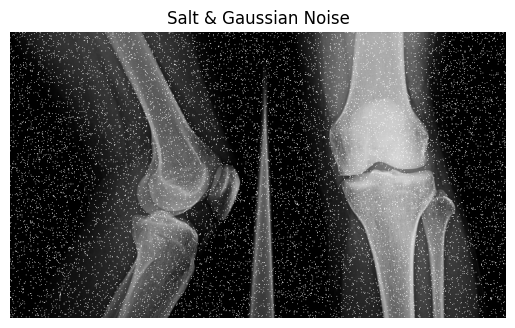

In [15]:
# Apply noise
salt_gaussian_image = add_salt_gaussian_noise(image, salt_prob=0.02, gaussian_std=0.5)
# Display the noisy image
plt.imshow(salt_gaussian_image, cmap='gray')
plt.title('Salt & Gaussian Noise')
plt.axis('off')
plt.show()


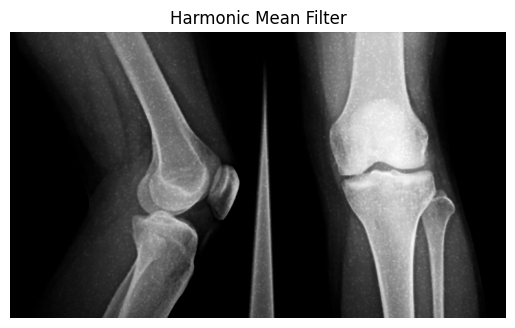

In [16]:
#4. Apply Harmonic Mean Filter
# Harmonic Mean Filter function
def harmonic_mean_filter(image, size=3):
    def harmonic_mean(values):
        return len(values) / np.sum(1.0 / (values + 1e-9))  # Avoid division by zero
    
    return generic_filter(image, harmonic_mean, size=(size, size))

# Apply filter
harmonic_filtered = harmonic_mean_filter(salt_gaussian_image)

# Display the result
plt.imshow(harmonic_filtered, cmap='gray')
plt.title('Harmonic Mean Filter')
plt.axis('off')
plt.show()


In [17]:
#5. Load Image & Add Salt-and-Pepper Noise
# Function to add salt-and-pepper noise
def add_salt_pepper_noise(image, prob=0.02):
    noisy_image = image.copy()
    num_pixels = np.ceil(prob * image.size)
    
    # Salt noise
    coords = [np.random.randint(0, i - 1, int(num_pixels / 2)) for i in image.shape]
    noisy_image[tuple(coords)] = 255
    
    # Pepper noise
    coords = [np.random.randint(0, i - 1, int(num_pixels / 2)) for i in image.shape]
    noisy_image[tuple(coords)] = 0
    
    return noisy_image


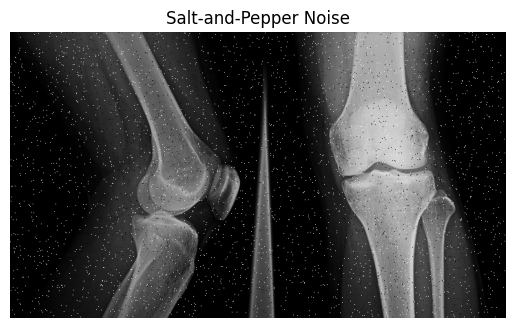

In [ ]:

# Apply noise
salt_pepper_image = add_salt_pepper_noise(image, prob=0.02)

# Display the noisy image
plt.imshow(salt_pepper_image, cmap='gray')
plt.title('Salt-and-Pepper Noise')
plt.axis('off')
plt.show()


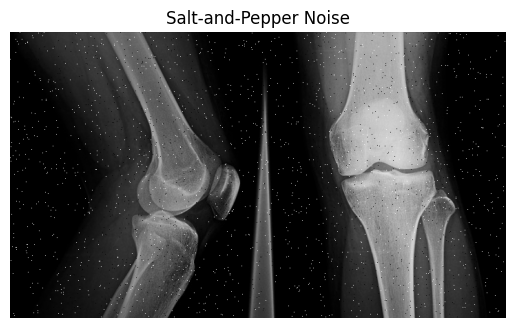

In [18]:
# Apply noise
salt_pepper_image = add_salt_pepper_noise(image, prob=0.01)

# Display the noisy image
plt.imshow(salt_pepper_image, cmap='gray')
plt.title('Salt-and-Pepper Noise')
plt.axis('off')
plt.show()


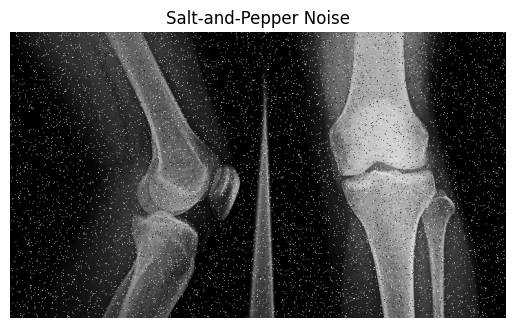

In [19]:
# Apply noise
salt_pepper_image = add_salt_pepper_noise(image, prob=0.05)

# Display the noisy image
plt.imshow(salt_pepper_image, cmap='gray')
plt.title('Salt-and-Pepper Noise')
plt.axis('off')
plt.show()


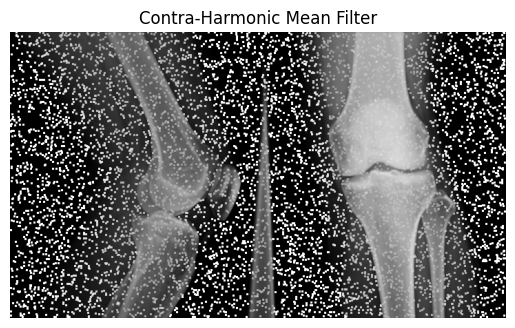

In [20]:
#6. Apply Contra-Harmonic Mean Filter
# Contra-Harmonic Mean Filter function
def contra_harmonic_mean_filter(image, size=3, Q=1.5):
    def contra_harmonic(values):
        numerator = np.sum(values ** (Q + 1))
        denominator = np.sum(values ** Q + 1e-9)  # Avoid division by zero
        return numerator / denominator
    
    return generic_filter(image, contra_harmonic, size=(size, size))

# Apply filter
contra_filtered = contra_harmonic_mean_filter(salt_pepper_image, Q=1.5)

# Display the result
plt.imshow(contra_filtered, cmap='gray')
plt.title('Contra-Harmonic Mean Filter')
plt.axis('off')
plt.show()
